

*Preprocessing using Employee Dataset*



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Class/Data/preprocessing_dataset.csv')
data

,Name,Age,Gender,Salary,Department
0,Alice,25.0,F,50000.0,HR
1,Bob,30.0,M,60000.0,Finance
2,Charlie,NaN,M,55000.0,IT
3,David,40.0,M,58000.0,HR
4,Eve,22.0,F,52000.0,IT
5,Frank,35.0,NaN,61000.0,Finance
6,Grace,120.0,F,NaN,Finance
7,Henry,28.0,M,59000.0,HR
8,Ivy,29.0,F,63000.0,IT
9,Jack,27.0,M,62000.0,Finance


In [ ]:
data.isna().sum()

,0
Name,0
Age,1
Gender,1
Salary,1
Department,0


In [ ]:
data.info()  # data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        10 non-null     object 
 1   Age         9 non-null      float64
 2   Gender      9 non-null      object 
 3   Salary      9 non-null      float64
 4   Department  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 532.0+ bytes


<Axes: >

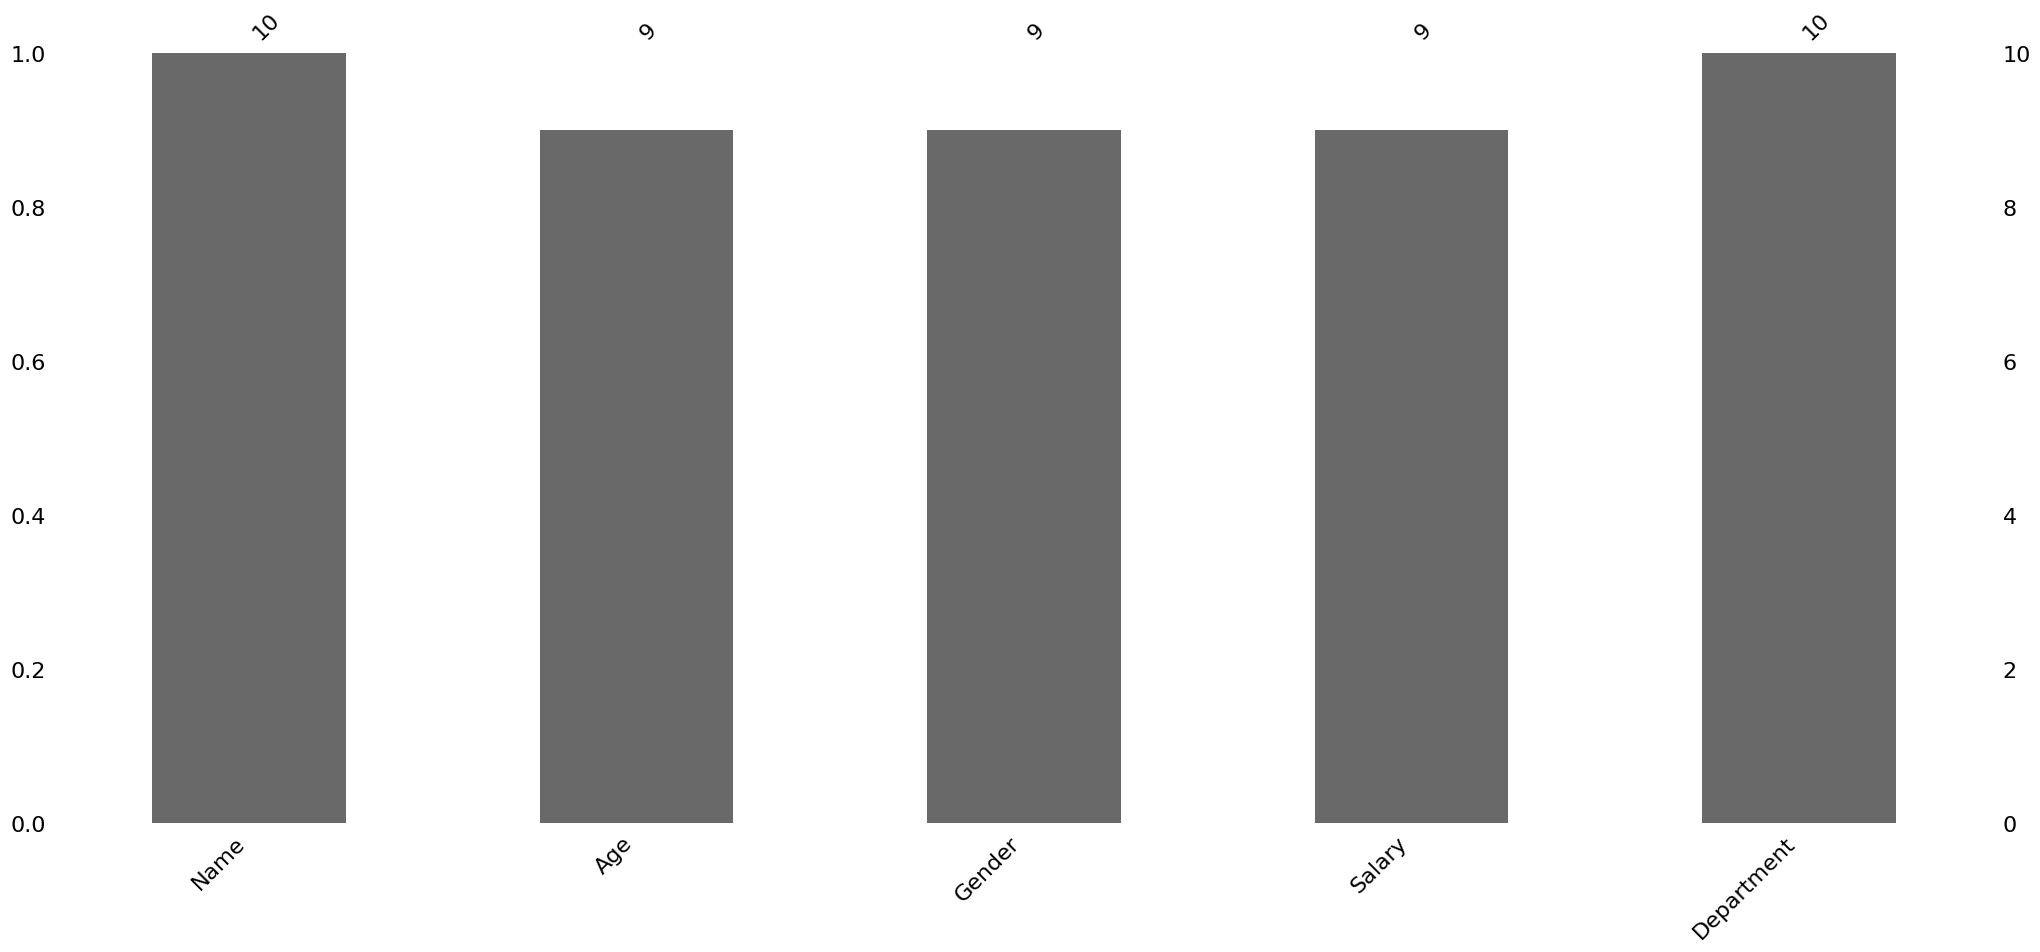

In [ ]:
!pip install missingno
import missingno as msno
msno.bar(data)

<Axes: >

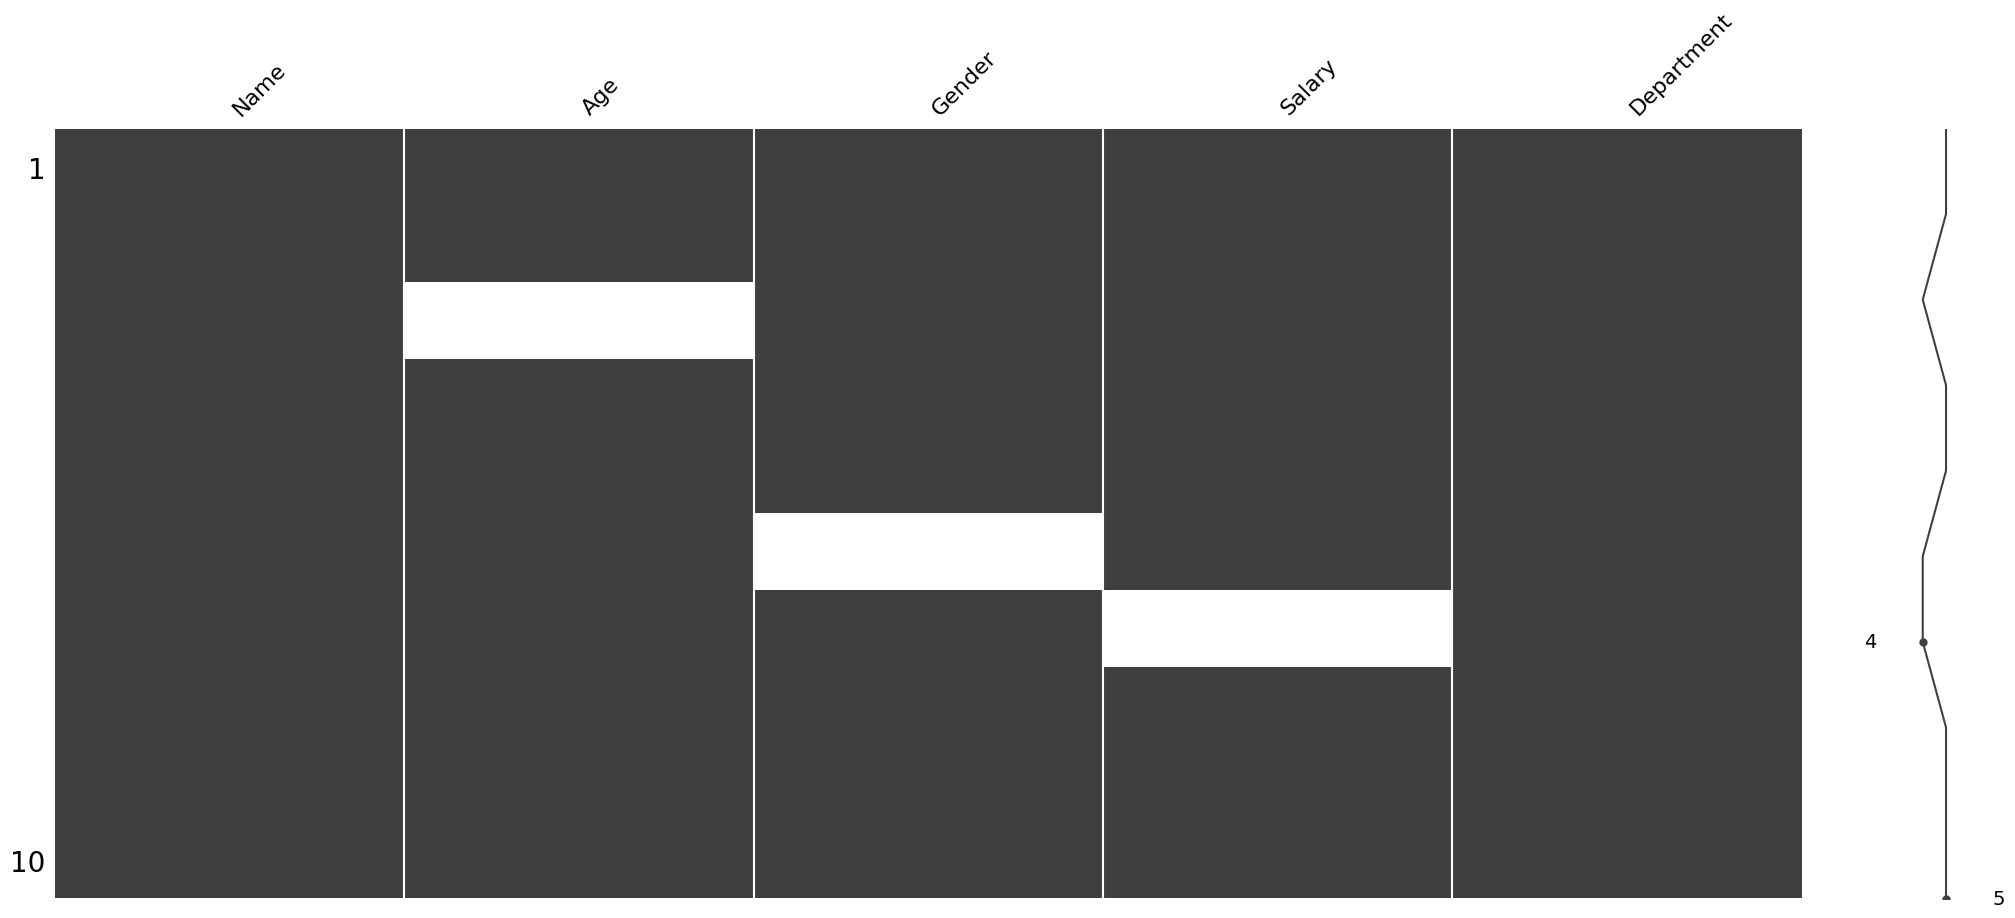

In [ ]:
msno.matrix(data)

<Axes: >

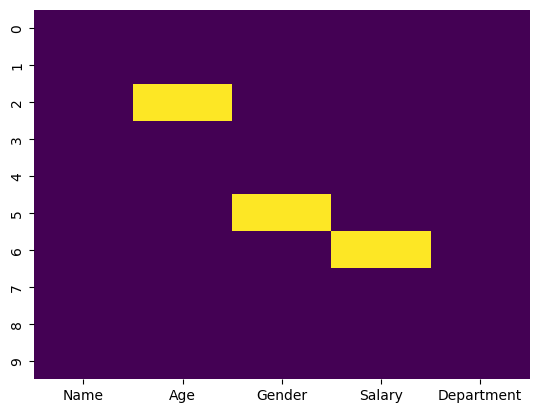

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(),cbar = False ,cmap ='viridis')

In [ ]:
# data.dropna(inplace = True)   # missing value will delete from the data (it used when minimal amount of data is misssing)
# data

In [ ]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Salary'].fillna(data['Salary'].median(),inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data

/tmp/ipython-input-11-480821990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
/tmp/ipython-input-11-480821990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,Name,Age,Gender,Salary,Department
0,Alice,25.000000,F,50000.0,HR
1,Bob,30.000000,M,60000.0,Finance
2,Charlie,39.555556,M,55000.0,IT
3,David,40.000000,M,58000.0,HR
4,Eve,22.000000,F,52000.0,IT
5,Frank,35.000000,M,61000.0,Finance
6,Grace,120.000000,F,59000.0,Finance
7,Henry,28.000000,M,59000.0,HR
8,Ivy,29.000000,F,63000.0,IT
9,Jack,27.000000,M,62000.0,Finance


In [ ]:
# # another method to fill the dataset
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan,strategy='mean')
# imp.fit(data['Salary'])

<Axes: ylabel='Age'>

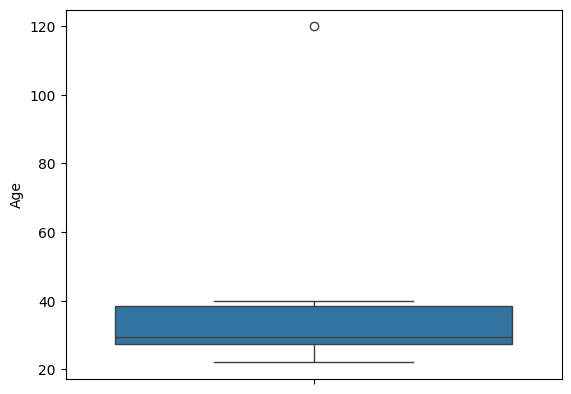

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
# To separate outlier
# Interquartile Range(IQR)

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3-Q1
lower_bound =Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
outliers = data[(data['Age']<lower_bound) | (data['Age']>upper_bound)]
outliers

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,59000.0,Finance


In [ ]:
from scipy.stats import zscore
z_scores = zscore(data['Age'])
data[np.abs(z_scores)>2.9]

,Name,Age,Gender,Salary,Department
6,Grace,120.0,F,59000.0,Finance


(Text(0.5, 0, 'Age'), Text(0, 0.5, 'Gender'))

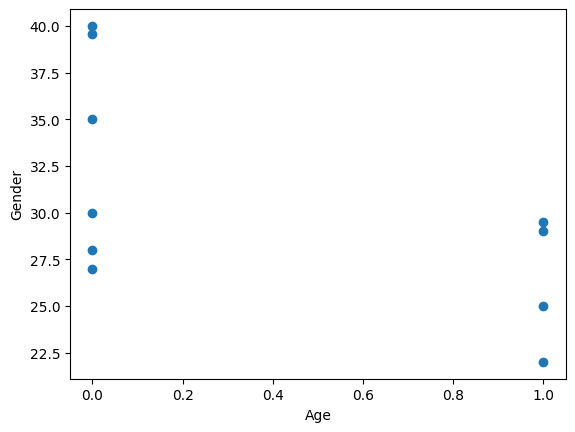

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['Gender'],data['Age'])
plt.xlabel('Age'),plt.ylabel('Gender')

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1, random_state=42)
data['Outlier'] = iso.fit_predict(data[['Age', 'Salary']])

# Typically, IsolationForest marks outliers as -1, inliers as 1
outliers = data[data['Outlier'] == -1]
print(outliers)

    Name    Age Gender   Salary Department  Outlier
6  Grace  120.0      F  59000.0    Finance       -1


In [ ]:
data['Age'] =np.where(data['Age']>100,data['Age'].median(),data['Age'])
data

,Name,Age,Gender,Salary,Department,Outlier
0,Alice,25.000000,F,50000.0,HR,1
1,Bob,30.000000,M,60000.0,Finance,1
2,Charlie,39.555556,M,55000.0,IT,1
3,David,40.000000,M,58000.0,HR,1
4,Eve,22.000000,F,52000.0,IT,1
5,Frank,35.000000,M,61000.0,Finance,1
6,Grace,29.500000,F,59000.0,Finance,-1
7,Henry,28.000000,M,59000.0,HR,1
8,Ivy,29.000000,F,63000.0,IT,1
9,Jack,27.000000,M,62000.0,Finance,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

,Name,Age,Gender,Salary,Department,Outlier
0,Alice,25.000000,0,50000.0,HR,1
1,Bob,30.000000,1,60000.0,Finance,1
2,Charlie,39.555556,1,55000.0,IT,1
3,David,40.000000,1,58000.0,HR,1
4,Eve,22.000000,0,52000.0,IT,1
5,Frank,35.000000,1,61000.0,Finance,1
6,Grace,29.500000,0,59000.0,Finance,-1
7,Henry,28.000000,1,59000.0,HR,1
8,Ivy,29.000000,0,63000.0,IT,1
9,Jack,27.000000,1,62000.0,Finance,1


In [ ]:
# another method for one hot encoding
data =pd.get_dummies(data,columns=['Department'])
data

,Name,Age,Gender,Salary,Outlier,Department_Finance,Department_HR,Department_IT
0,Alice,25.000000,0,50000.0,1,False,True,False
1,Bob,30.000000,1,60000.0,1,True,False,False
2,Charlie,39.555556,1,55000.0,1,False,False,True
3,David,40.000000,1,58000.0,1,False,True,False
4,Eve,22.000000,0,52000.0,1,False,False,True
5,Frank,35.000000,1,61000.0,1,True,False,False
6,Grace,29.500000,0,59000.0,-1,True,False,False
7,Henry,28.000000,1,59000.0,1,False,True,False
8,Ivy,29.000000,0,63000.0,1,False,False,True
9,Jack,27.000000,1,62000.0,1,True,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
n = OneHotEncoder(sparse_output=False)
data['Gender'] = n.fit_transform(data[['Gender']])
data

,Name,Age,Gender,Salary,Outlier,Department_Finance,Department_HR,Department_IT
0,Alice,25.000000,1.0,50000.0,1,False,True,False
1,Bob,30.000000,0.0,60000.0,1,True,False,False
2,Charlie,39.555556,0.0,55000.0,1,False,False,True
3,David,40.000000,0.0,58000.0,1,False,True,False
4,Eve,22.000000,1.0,52000.0,1,False,False,True
5,Frank,35.000000,0.0,61000.0,1,True,False,False
6,Grace,29.500000,1.0,59000.0,-1,True,False,False
7,Henry,28.000000,0.0,59000.0,1,False,True,False
8,Ivy,29.000000,1.0,63000.0,1,False,False,True
9,Jack,27.000000,0.0,62000.0,1,True,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
data['Age_std'] =sc.fit_transform(data[['Age']])
data

,Name,Age,Gender,Salary,Outlier,Department_Finance,Department_HR,Department_IT,Age_std
0,Alice,25.000000,1.0,50000.0,1,False,True,False,-0.977844
1,Bob,30.000000,0.0,60000.0,1,True,False,False,-0.089792
2,Charlie,39.555556,0.0,55000.0,1,False,False,True,1.607374
3,David,40.000000,0.0,58000.0,1,False,True,False,1.686312
4,Eve,22.000000,1.0,52000.0,1,False,False,True,-1.510675
5,Frank,35.000000,0.0,61000.0,1,True,False,False,0.798260
6,Grace,29.500000,1.0,59000.0,-1,True,False,False,-0.178597
7,Henry,28.000000,0.0,59000.0,1,False,True,False,-0.445013
8,Ivy,29.000000,1.0,63000.0,1,False,False,True,-0.267402
9,Jack,27.000000,0.0,62000.0,1,True,False,False,-0.622623


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data['Salary_norm'] = mm.fit_transform(data[['Salary']])
data

,Name,Age,Gender,Salary,Outlier,Department_Finance,Department_HR,Department_IT,Age_std,Salary_norm
0,Alice,25.000000,1.0,50000.0,1,False,True,False,-0.977844,0.000000
1,Bob,30.000000,0.0,60000.0,1,True,False,False,-0.089792,0.769231
2,Charlie,39.555556,0.0,55000.0,1,False,False,True,1.607374,0.384615
3,David,40.000000,0.0,58000.0,1,False,True,False,1.686312,0.615385
4,Eve,22.000000,1.0,52000.0,1,False,False,True,-1.510675,0.153846
5,Frank,35.000000,0.0,61000.0,1,True,False,False,0.798260,0.846154
6,Grace,29.500000,1.0,59000.0,-1,True,False,False,-0.178597,0.692308
7,Henry,28.000000,0.0,59000.0,1,False,True,False,-0.445013,0.692308
8,Ivy,29.000000,1.0,63000.0,1,False,False,True,-0.267402,1.000000
9,Jack,27.000000,0.0,62000.0,1,True,False,False,-0.622623,0.923077
